In [1]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
#load data
df = pd.read_csv('data/kjv.csv')
#rename columns
df = df.rename(columns = {'field': 'Code',
                          'field.1': 'Book',
                          'field.2': 'Chapter',
                          'field.3': 'Verse', 
                          'field.4': 'Words'})

df.head()

,Code,Book,Chapter,Verse,Words
0,1001001,1,1,1,In the beginning God created the heaven and th...
1,1001002,1,1,2,"And the earth was without form, and void; and ..."
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,1,1,5,"And God called the light Day, and the darkness..."


In [3]:
#load titles data
titles = pd.read_csv('data/key_english.csv')
#rename columns
titles = titles.rename(columns = {'field': 'Book', 
                                  'field.1': 'Title',
                                  'field.2': 'OT/NT',
                                  'field.3': 'GenreCode'})

titles.head()

,Book,Title,OT/NT,GenreCode
0,1,Genesis,OT,1
1,2,Exodus,OT,1
2,3,Leviticus,OT,1
3,4,Numbers,OT,1
4,5,Deuteronomy,OT,1


In [4]:
#load genre data
genre = pd.read_csv('data/key_genre_english.csv')
#rename columns
genre = genre.rename(columns = {'field': 'GenreCode', 
                                'field.1': 'Genre'})

genre.head()

,GenreCode,Genre
0,1,Law
1,2,History
2,3,Wisdom
3,4,Prophets
4,5,Gospels


In [5]:
#merge titles with genre
merge = titles.merge(genre)
merge.drop(merge.columns[[3]], axis=1, inplace=True)
#merge merge with df
data = df.merge(merge)
#rearrannge columns
data = data[['Code', 'Title', 'OT/NT', 'Genre', 'Book', 'Chapter', 'Verse', 'Words']]

data.head()

,Code,Title,OT/NT,Genre,Book,Chapter,Verse,Words
0,1001001,Genesis,OT,Law,1,1,1,In the beginning God created the heaven and th...
1,1001002,Genesis,OT,Law,1,1,2,"And the earth was without form, and void; and ..."
2,1001003,Genesis,OT,Law,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,Genesis,OT,Law,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,Genesis,OT,Law,1,1,5,"And God called the light Day, and the darkness..."


## Transform the data

Create dataframes for exploratory data analysis

In [6]:
#separate words and stack in a column
vw = data['Words'].str.split(' ', expand=True).stack()
#remove punctation marks
vw = vw.apply(lambda x:''.join([i for i in x if i not in string.punctuation]))
#to match the index to the verse it came from
vw.index = vw.index.droplevel(1)
#name column
vw.name = "vw"
#join new column to old dataframe
complete = data.join(vw)

complete.head()

,Code,Title,OT/NT,Genre,Book,Chapter,Verse,Words,vw
0,1001001,Genesis,OT,Law,1,1,1,In the beginning God created the heaven and th...,In
0,1001001,Genesis,OT,Law,1,1,1,In the beginning God created the heaven and th...,the
0,1001001,Genesis,OT,Law,1,1,1,In the beginning God created the heaven and th...,beginning
0,1001001,Genesis,OT,Law,1,1,1,In the beginning God created the heaven and th...,God
0,1001001,Genesis,OT,Law,1,1,1,In the beginning God created the heaven and th...,created


In [7]:
#change all strings to lower case letters
lower = complete['vw'].str.lower()
#name column
lower.name = "vw_lower"
#join new column to original dataframe
complete_lower = data.join(lower)

complete_lower.head()

,Code,Title,OT/NT,Genre,Book,Chapter,Verse,Words,vw_lower
0,1001001,Genesis,OT,Law,1,1,1,In the beginning God created the heaven and th...,in
0,1001001,Genesis,OT,Law,1,1,1,In the beginning God created the heaven and th...,the
0,1001001,Genesis,OT,Law,1,1,1,In the beginning God created the heaven and th...,beginning
0,1001001,Genesis,OT,Law,1,1,1,In the beginning God created the heaven and th...,god
0,1001001,Genesis,OT,Law,1,1,1,In the beginning God created the heaven and th...,created


## Visualization

In [8]:
#counting the top 50 words in the exact way that they appeared
complete['vw'].value_counts().to_frame('Counts').reset_index().head(50)

,index,Counts
0,the,62064
1,and,38847
2,of,34427
3,to,13378
4,And,12846
5,that,12577
6,in,12331
7,shall,9760
8,he,9666
9,unto,8940


Observations:
- It's not surprising that 'the' is the most used word
- What I find interesting is that 'he' and 'I' are used more than LORD
- most words look like they mean the same thing
- 'said' is the most used action verb
- Israel is the most used name

Note:
- words will be taken as is, as it is a word-for word translation and LORD and God come from different hebrew/greek words

Of the top 50 words, the list under woi is what I find interesting

In [9]:
#words of interest from the top 50
woi = ['he', 'I', 'his', 'they', 'him', 
       'LORD', 'them', 'thou', 'thy', 'my',
       'me', 'God', 'said', 'their', 'thee',
       'ye', 'you', 'man', 'Israel']

#woi in lower case, for later use
woi_lower = map(lambda x:x.lower(),woi)

In [10]:
#get totals on interest list
c = complete['vw'].value_counts().to_frame('Counts').reset_index()
#rename for consistency
c = c.rename(columns={'index' : 'vw'})
#get counts on interest list
cT = c[c['vw'].isin(woi)]
cT.head()

,vw,Counts
8,he,9666
10,I,8854
11,his,8385
14,they,6970
17,him,6649


In [11]:
# get totals on interest list
c = complete_lower['vw_lower'].value_counts().to_frame('Counts').reset_index()
#rename for consistency
c = c.rename(columns={'index' : 'vw_lower'})
#get counts on interest list
cT_lower = c[c['vw_lower'].isin(woi_lower)]
cT_lower.head()

,vw_lower,Counts
6,he,10420
10,i,8854
11,his,8473
13,lord,7830
14,they,7376


Is there a difference when woi is classified according to Old or New Testament?

In [12]:
#get totals on interest list with OT/NT
c = complete.groupby('OT/NT', sort=False)['vw'].value_counts().to_frame('Counts').reset_index()
#get counts on interest list
cT_OTNT = c[c['vw'].isin(woi)]
cT_OTNT.head()

,OT/NT,vw,Counts
8,OT,his,6963
9,OT,he,6799
10,OT,I,6669
11,OT,LORD,6513
16,OT,they,5083


Is there a difference when woi is classified according to book?

In [13]:
#get totals on interest list with book titles
c = complete.groupby('Title', sort=False)['vw'].value_counts().to_frame('Counts').reset_index()
#get results on interest list
cT_Title = c[c['vw'].isin(woi)]
cT_Title.head()

,Title,vw,Counts
4,Genesis,his,651
5,Genesis,he,646
10,Genesis,I,484
11,Genesis,said,477
12,Genesis,him,402


Is there a difference when an instance of the words are counted once per verse?

In [14]:
#create a dataframe to do a single count per verse
single = data.copy()
#remove punctuation marks and split string
single['word_list'] = single.Words.apply(lambda x:''.join([i for i in x if i not in string.punctuation])).str.split()
#remove duplicates
single['word_set'] = single.word_list.apply(lambda x: list(set(x)))
#combine all words in a single list
all_words = single.word_set.tolist()
all_words = reduce(lambda x, y: x+y, all_words)

In [15]:
#count all words
single_count = pd.DataFrame.from_dict(Counter(all_words), orient='index').reset_index()
single_count = single_count.rename(columns = {'index': 'word', 0: 'Counts'})
single_count = single_count.sort_values('Counts', ascending=False).reset_index(drop=True)

single_count.head()

,word,Counts
0,the,23641
1,and,20734
2,of,18087
3,And,12028
4,that,9688


Does the change in the way we counted words affected?

In [16]:
single_woi = single_count[single_count['word'].isin(woi)]
single_woi.head()

,word,Counts
8,he,7164
10,I,6026
12,his,5923
14,LORD,5552
18,they,5255


In [17]:
#create a dataframe to do a single count per verse with all letter case in lower case
single_lower = data.copy()
#remove punctuation marks, place all in lower case and split string
single_lower['word_list'] = single_lower.Words.apply(lambda x:''.join([i for i in x if i not in string.punctuation])).str.lower().str.split()
#remove duplicates
single_lower['word_set'] = single_lower.word_list.apply(lambda x: list(set(x)))
#combine all words in a single list
all_words_lower = single_lower.word_set.tolist()
all_words_lower = reduce(lambda x, y: x+y, all_words_lower)

In [18]:
#count all words in lower case
single_count_lower = pd.DataFrame.from_dict(Counter(all_words_lower), orient='index').reset_index()
single_count_lower = single_count_lower.rename(columns = {'index': 'word', 0: 'Counts'})
single_count_lower = single_count_lower.sort_values('Counts', ascending=False).reset_index(drop=True)

single_count_lower.head()

,word,Counts
0,the,24092
1,and,23867
2,of,18122
3,that,9897
4,to,9683


## Graphs and other Visuals

In [19]:
#list of items for reference
T = ['OT', 'NT']
BT = titles.Title
G = genre.Genre

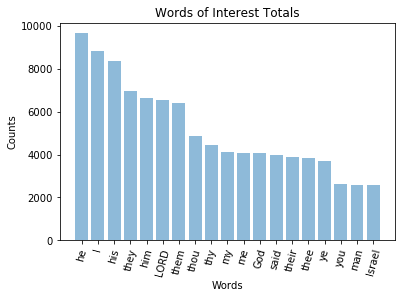

In [20]:
#plot words of interest totals
word = cT['vw']
n = np.arange(len(word))
count = cT['Counts']

plt.bar(n, count, align='center', alpha=0.5)

plt.xticks(n, word, rotation=75)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Words of Interest Totals')
 
plt.show()

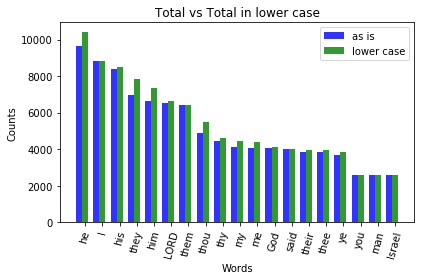

In [21]:
#Total vs Total in lower case
# data to plot
word = cT['vw']
count_cT = cT['Counts']
count_cT_lower = cT_lower['Counts']

# create plot
fig, ax = plt.subplots()
index = np.arange(len(word))
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, count_cT, bar_width,
                 alpha=opacity,
                 color='b',
                 label='as is')
 
rects2 = plt.bar(index + bar_width, count_cT_lower, bar_width,
                 alpha=opacity,
                 color='g',
                 label='lower case')
 
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Total vs Total in lower case')
plt.xticks(index + bar_width, word, rotation=75)
plt.legend()
 
plt.tight_layout()
plt.show()

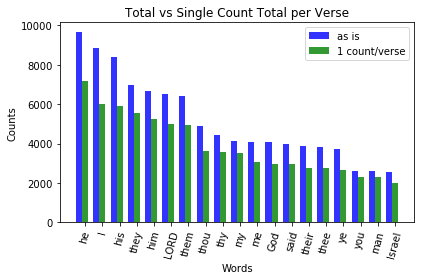

In [22]:
#Total vs Single Count Total per Verse
# data to plot
word = cT['vw']
count_cT = cT['Counts']
count_single_woi = single_woi['Counts']

# create plot
fig, ax = plt.subplots()
index = np.arange(len(word))
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, count_cT, bar_width,
                 alpha=opacity,
                 color='b',
                 label='as is')
 
rects2 = plt.bar(index + bar_width, count_single_woi, bar_width,
                 alpha=opacity,
                 color='g',
                 label='1 count/verse')
 
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Total vs Single Count Total per Verse')
plt.xticks(index + bar_width, word, rotation=75)
plt.legend()
 
plt.tight_layout()
plt.show()

In [23]:
#comparison between two words I vs LORD in OT and NT
cT_OTNT_I_LORD = cT_OTNT[cT_OTNT['vw'].isin(['I', 'LORD'])]
cT_OTNT_I_LORD

,OT/NT,vw,Counts
10,OT,I,6669
11,OT,LORD,6513
11537,NT,I,2185
12207,NT,LORD,26


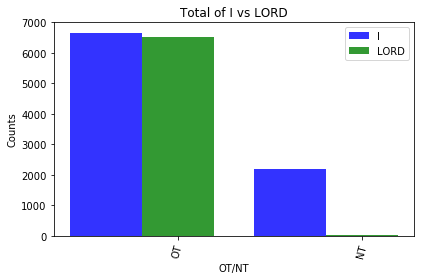

In [24]:
#comparison between two words I vs LORD in OT and NT
# data to plot
OTNT = T
I = cT_OTNT_I_LORD.loc[cT_OTNT_I_LORD['vw'] == 'I', 'Counts']
LORD = cT_OTNT_I_LORD.loc[cT_OTNT_I_LORD['vw'] == 'LORD', 'Counts']

# create plot
fig, ax = plt.subplots()
index = np.arange(len(OTNT))
bar_width = 0.39
opacity = 0.8
 
rects1 = plt.bar(index, I, bar_width,
                 alpha=opacity,
                 color='b',
                 label='I')
 
rects2 = plt.bar(index + bar_width, LORD, bar_width,
                 alpha=opacity,
                 color='g',
                 label='LORD')
 
plt.xlabel('OT/NT')
plt.ylabel('Counts')
plt.title('Total of I vs LORD')
plt.xticks(index + bar_width, OTNT, rotation=75)
plt.legend()
 
plt.tight_layout()
plt.show()

In [25]:
#comparison between two words LORD vs God in OT and NT
cT_OTNT_LORD_GOD = cT_OTNT[cT_OTNT['vw'].isin(['LORD', 'God'])]
cT_OTNT_LORD_GOD

,OT/NT,vw,Counts
11,OT,LORD,6513
36,OT,God,2736
11550,NT,God,1349
12207,NT,LORD,26


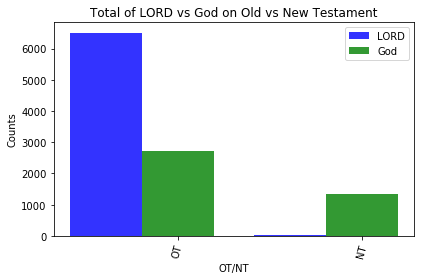

In [26]:
#comparison between two words LORD vs God in OT and NT
# data to plot
OTNT = T
LORD = cT_OTNT_LORD_GOD.loc[cT_OTNT_LORD_GOD['vw'] == 'LORD', 'Counts']
God = cT_OTNT_LORD_GOD.loc[cT_OTNT_LORD_GOD['vw'] == 'God', 'Counts']

# create plot
fig, ax = plt.subplots()
index = np.arange(len(OTNT))
bar_width = 0.39
opacity = 0.8
 
rects1 = plt.bar(index, LORD, bar_width,
                 alpha=opacity,
                 color='b',
                 label='LORD')
 
rects2 = plt.bar(index + bar_width, God, bar_width,
                 alpha=opacity,
                 color='g',
                 label='God')
 
plt.xlabel('OT/NT')
plt.ylabel('Counts')
plt.title('Total of LORD vs God on Old vs New Testament')
plt.xticks(index + bar_width, OTNT, rotation=75)
plt.legend()
 
plt.tight_layout()
plt.show()

In [27]:
#get only I and LORD from VerseWords
cT_Title_I_LORD = cT_Title[cT_Title['vw'].isin(['I', 'LORD'])]

#separate dataframes to place 0 counts on the data where no value is available
cT_I = cT_Title_I_LORD[cT_Title_I_LORD['vw'] == 'I']
cT_LORD = cT_Title_I_LORD[cT_Title_I_LORD['vw'] == 'LORD']

#merge to match data then fill null values
cT_ILORD = pd.merge(cT_I , cT_LORD , how='left', on=['Title'])
cT_ILORD.loc[(cT_ILORD['vw_y'].isnull()) & (cT_ILORD.Title == BT), 'vw_y']= 'LORD'
cT_ILORD.Counts_y.fillna(0, inplace=True)
cT_LORD = cT_ILORD[['Title', 'vw_y', 'Counts_y']]
cT_LORD = cT_LORD.rename(columns = {'vw_y': 'vw', 'Counts_y': 'Counts'})

#merge to create a new dataframe with same dimensions
cT_Title_I_LORD = pd.merge(cT_I , cT_LORD , how='outer', on=['Title', 'vw', 'Counts'])
cT_Title_I_LORD.head()

,Title,vw,Counts
0,Genesis,I,484
1,Exodus,I,270
2,Leviticus,I,128
3,Numbers,I,158
4,Deuteronomy,I,223


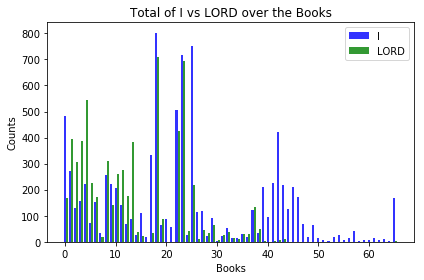

In [28]:
#comparison between two words I vs LORD in the books using a bar graph

# create plot
fig, ax = plt.subplots()
book = BT
index = np.arange(len(book))
I = cT_Title_I_LORD.loc[cT_Title_I_LORD['vw'] == 'I', 'Counts']
LORD = cT_Title_I_LORD.loc[cT_Title_I_LORD['vw'] == 'LORD', 'Counts']
bar_width = 0.40
opacity = 0.8
 
rects1 = plt.bar(index, I, bar_width,
                 alpha=opacity,
                 color='b',
                 label='I')
 
rects2 = plt.bar(index + bar_width, LORD, bar_width,
                 alpha=opacity,
                 color='g',
                 label='LORD')
 
plt.xlabel('Books')
plt.ylabel('Counts')
plt.title('Total of I vs LORD over the Books')
#plt.xticks(index + bar_width, book, rotation=75)
plt.legend()
 
plt.tight_layout()
plt.show()

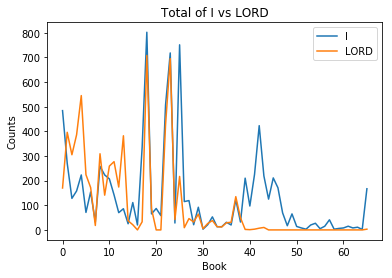

In [29]:
#comparison between two words I vs LORD in the books in a line graph
book = BT
index = np.arange(len(book))
I = cT_Title_I_LORD.loc[cT_Title_I_LORD['vw'] == 'I', 'Counts']
LORD = cT_Title_I_LORD.loc[cT_Title_I_LORD['vw'] == 'LORD', 'Counts']

plt.xlabel('Book')
plt.ylabel('Counts')
plt.title('Total of I vs LORD')
#plt.xticks(index, book, rotation=75)

plt.plot(index, I, label='I')
plt.plot(index, LORD, label='LORD')

plt.legend()

plt.show()

In [30]:
#comparison between I vs he vs they in the Old and New Testament
cT_OTNT_he_I_they = cT_OTNT[cT_OTNT['vw'].isin(['I', 'he', 'they'])]
cT_OTNT_he_I_they

,OT/NT,vw,Counts
9,OT,he,6799
10,OT,I,6669
16,OT,they,5083
11533,NT,he,2867
11537,NT,I,2185
11540,NT,they,1887


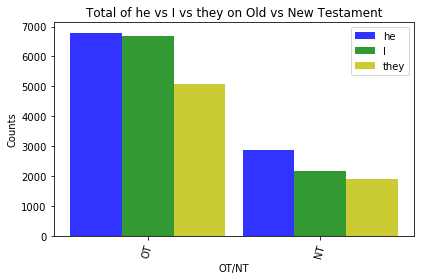

In [31]:
#comparison between I vs he vs they in the Old and New Testament

# data to plot
OTNT = T
he = cT_OTNT_he_I_they.loc[cT_OTNT_he_I_they['vw'] == 'he', 'Counts']
I = cT_OTNT_he_I_they.loc[cT_OTNT_he_I_they['vw'] == 'I', 'Counts']
they = cT_OTNT_he_I_they.loc[cT_OTNT_he_I_they['vw'] == 'they', 'Counts']

# create plot
fig, ax = plt.subplots()
index = np.arange(len(OTNT))
bar_width = 0.30
opacity = 0.8
 
rects1 = plt.bar(index, he, bar_width,
                 alpha=opacity,
                 color='b',
                 label='he')
 
rects2 = plt.bar(index + bar_width, I, bar_width,
                 alpha=opacity,
                 color='g',
                 label='I')

rects3 = plt.bar(index + (2 * bar_width), they, bar_width,
                 alpha=opacity,
                 color='y',
                 label='they')

plt.xlabel('OT/NT')
plt.ylabel('Counts')
plt.title('Total of he vs I vs they on Old vs New Testament')
plt.xticks(index + bar_width, OTNT, rotation=75)
plt.legend()
 
plt.tight_layout()
plt.show()

## Statistics

In [32]:
print ("KJV Bible Stats Summary")
print ("Books: " + str(len(titles)))
print ("Verses " + str(len(data)))
print ("Words: " + str(len(complete)))
print ("Unique Words: " + str(len(complete.vw.unique())))
print ("Unique Words in %: " + str(round((len(complete.vw.unique())/float(len(complete)) * 100), 2)))

KJV Bible Stats Summary
Books: 66
Verses 31103
Words: 789635
Unique Words: 13719
Unique Words in %: 1.74


In [33]:
print ("OT Stats Summary")
print ("Books: " + str(len(titles[titles['OT/NT'] == 'OT'])))
print ("Books in Bible %: " + str(round((len(titles[titles['OT/NT'] == 'OT'])/float(len(titles)) * 100), 2)))
print ("Verses: " + str(len(data[data['OT/NT'] == 'OT'])))
print ("Verses in Bible %: " + str(round((len(data[data['OT/NT'] == 'OT'])/float(len(data)) * 100), 2)))
print ("Words: " + str(len(complete[complete['OT/NT'] == 'OT'])))
print ("Words in Bible %: " + str(round((len(complete[complete['OT/NT'] == 'OT'])/float(len(complete)) * 100), 2)))
print ("Unique Words: " + str(len(complete.loc[complete ['OT/NT'] == 'OT', 'vw'].unique())))
print ("Unique Words in %: " + str(round(len(complete.loc[complete ['OT/NT'] == 'OT', 'vw'].unique())/float(len(complete[complete['OT/NT'] == 'OT'])) * 100, 2)))

OT Stats Summary
Books: 39
Books in Bible %: 59.09
Verses: 23145
Verses in Bible %: 74.41
Words: 609253
Words in Bible %: 77.16
Unique Words: 11527
Unique Words in %: 1.89


In [34]:
print ("NT Stats Summary")
print ("Books: " + str(len(titles[titles['OT/NT'] == 'NT'])))
print ("Books in Bible %: " + str(round((len(titles[titles['OT/NT'] == 'NT'])/float(len(titles)) * 100), 2)))
print ("Verses: " + str(len(data[data['OT/NT'] == 'NT'])))
print ("Verses in Bible %: " + str(round((len(data[data['OT/NT'] == 'NT'])/float(len(data)) * 100), 2)))
print ("Words: " + str(len(complete[complete['OT/NT'] == 'NT'])))
print ("Words in Bible %: " + str(round((len(complete[complete['OT/NT'] == 'NT'])/float(len(complete)) * 100), 2)))
print ("Unique Words: " + str(len(complete.loc[complete ['OT/NT'] == 'NT', 'vw'].unique())))
print ("Unique Words in %: " + str(round(len(complete.loc[complete ['OT/NT'] == 'NT', 'vw'].unique())/float(len(complete[complete['OT/NT'] == 'NT'])) * 100, 2)))

NT Stats Summary
Books: 27
Books in Bible %: 40.91
Verses: 7958
Verses in Bible %: 25.59
Words: 180382
Words in Bible %: 22.84
Unique Words: 6555
Unique Words in %: 3.63


In [35]:
#to get the number of total number of words used per book, percentage of the words to the entire bible, 
#and unique words per book
books = titles.Title

book_s = complete.groupby('Title', sort=False)['vw'].value_counts().to_frame('Counts').reset_index()
book_stats = pd.DataFrame()

for x in books:
    words_total = book_s[book_s['Title'] == x].sum()['Counts']
    words_percent = round(book_s[book_s['Title'] == x].sum()['Counts']/float(len(complete)) * 100, 2)
    unique_total = (book_s[book_s['Title'] == x]).count()['vw']
    unique_percent = round((book_s[book_s['Title'] == x]).count()['vw'] / float(words_total) * 100, 2)
    book_stats = book_stats.append(pd.DataFrame([[x, words_total, words_percent,  unique_total, unique_percent]], 
                                                columns =['Title', 'words_total', 'words_percent', 
                                                          'unique_total', 'unique_percent']),
                                   ignore_index=True)

book_stats

,Title,words_total,words_percent,unique_total,unique_percent
0,Genesis,38265,4.85,2648,6.92
1,Exodus,32684,4.14,2179,6.67
2,Leviticus,24543,3.11,1492,6.08
3,Numbers,32895,4.17,2196,6.68
4,Deuteronomy,28352,3.59,2178,7.68
5,Joshua,18852,2.39,1712,9.08
6,Judges,18966,2.40,1794,9.46
7,Ruth,2574,0.33,558,21.68
8,1 Samuel,25047,3.17,2031,8.11
9,2 Samuel,20599,2.61,2009,9.75


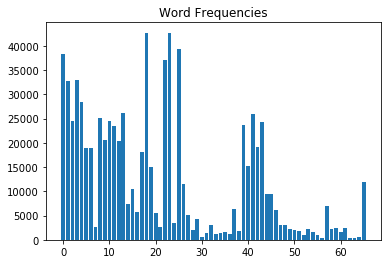

In [36]:
#words frequencies
words_total = book_stats['words_total']
index = np.arange(len(books))
plt.title('Word Frequencies')
plt.bar(index, words_total)
plt.show()

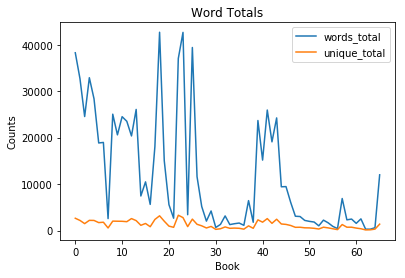

In [37]:
#see the trends of words used
book = BT
index = np.arange(len(book))
w_t = book_stats['words_total']
u_t= book_stats['unique_total']

plt.xlabel('Book')
plt.ylabel('Counts')
plt.title('Word Totals')
#plt.xticks(index, book, rotation=75)

plt.plot(index, w_t, label='words_total')
plt.plot(index, u_t, label='unique_total')

plt.legend()

plt.show()

In [38]:
#to get the number of books per genre, percentage in terms of books, total number of words used per genre,
#percentage of the words to the entire bible, unqiue total for the genre and unique percent as compared to word total
genres = genre.Genre

genre_s = complete.groupby('Genre', sort=False)['vw'].value_counts().to_frame('Counts').reset_index()
genre_stats = pd.DataFrame()

for x in genres:
    book_total = len(merge[merge['Genre'] == x])
    book_percent = round((len(merge[merge['Genre'] == x])/float(len(titles)) * 100), 2)
    words_total = genre_s[genre_s['Genre'] == x].sum()['Counts']
    words_percent = round(genre_s[genre_s['Genre'] == x].sum()['Counts']/float(len(complete)) * 100, 2)
    unique_total = (genre_s[genre_s['Genre'] == x]).count()['vw']
    unique_percent = round((genre_s[genre_s['Genre'] == x]).count()['vw'] / float(words_total) * 100, 2)
    genre_stats = genre_stats.append(pd.DataFrame([[x, book_total, book_percent, 
                                                    words_total, words_percent, unique_total, unique_percent]], 
                                                    columns =['Genre', 'books', 'book_percent',
                                                              'words_total', 'words_percent', 
                                                              'unique_total', 'unique_percent']),
                                                    ignore_index=True)

genre_stats

,Genre,books,book_percent,words_total,words_percent,unique_total,unique_percent
0,Law,5,7.58,156739,19.85,5064,3.23
1,History,12,18.18,204055,25.84,6896,3.38
2,Wisdom,5,7.58,84058,10.65,4762,5.67
3,Prophets,17,25.76,164401,20.82,5820,3.54
4,Gospels,4,6.06,83883,10.62,3797,4.53
5,Acts,1,1.52,24246,3.07,2436,10.05
6,Epistles,21,31.82,60258,7.63,4139,6.87
7,Apocalyptic,1,1.52,11995,1.52,1382,11.52


In [39]:
#most used words
complete['vw'].value_counts().to_frame('Counts').reset_index().head(50)

,index,Counts
0,the,62064
1,and,38847
2,of,34427
3,to,13378
4,And,12846
5,that,12577
6,in,12331
7,shall,9760
8,he,9666
9,unto,8940


## Trivial Facts

In [40]:
#longest word 
longest = complete.vw.map(len).max()
for x in complete.vw:
    if len(x) == longest:
        print ('The longest word is ' + str(x) + 'and it has ' + str(longest) + ' letters.')
        break

The longest word is Mahershalalhashbazand it has 18 letters.


In [41]:
#book with the most words
book_stats[book_stats['words_total'] == book_stats.words_total.max()]

,Title,words_total,words_percent,unique_total,unique_percent
18,Psalms,42684,5.41,3174,7.44


In [42]:
#book with the most unique words used
book_stats[book_stats['unique_total'] == book_stats.unique_total.max()]

,Title,words_total,words_percent,unique_total,unique_percent
22,Isaiah,37039,4.69,3301,8.91


In [43]:
#genre with most words used
genre_stats[genre_stats['words_total'] == genre_stats.words_total.max()]

,Genre,books,book_percent,words_total,words_percent,unique_total,unique_percent
1,History,12,18.18,204055,25.84,6896,3.38


In [44]:
#genre with most words used
genre_stats[genre_stats['unique_total'] == genre_stats.unique_total.max()]

,Genre,books,book_percent,words_total,words_percent,unique_total,unique_percent
1,History,12,18.18,204055,25.84,6896,3.38


## Initial Findings

There were some interesting findings from the initial analysis that we did. 
They are the following:
- “he” and “I” are used more than “LORD” and “God”. From here, we can say that the Bible is really more about the people in relation to God. Instead of being solely about God.
- Regardless of how the words were counted, its frequency is more or less the same with little changes in the rankings of the most used words.
- One interesting trend is that on the New Testament, there are less occurrences of the word LORD and there are more occurrences of the word God. It is possible that the name used might have been different but it may refer to the same thing. Another factor to consider is that Jesus is a central character in the New Testament but the name has been excluded because it didn’t crack the top 50, not even the top 100 if the list is expanded.
- The downtrend of the word totals from the Old to the New Testament can be explained by the lesser number of books. About 60% of the books in the Bible are considered part of the Old Testament.
- When looking for word totals, in the New Testament it should be looked at in proportion to the entire Bible. (~77% of the words are in the Old Testament while ~23% for the New Testament).
